# Linear regression

- Daily interview Q&A for 5/6/20, lead by Ben Lacar
- This problem covers: standard error, t-statistic, linear regression, f-statistic, ANOVA, using statsmodels
- This is good to know for analyst and machine learning roles

[Relevant chapter from ISLR](https://link.springer.com/chapter/10.1007/978-1-4614-7138-7_3#enumeration)
<br>
[Writing math symbols in markdown](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Typesetting%20Equations.html)
<br>
[quick reference](https://math.meta.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference)

In [2]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
os.chdir('/Users/lacar/Documents/Goals_and_careers/Biotech_Industry/UCSF_health_innovation_fellowship/assessment')

In [5]:
df = pd.read_csv("data.csv")
df.head()

,type,version,varX,varY
0,A,one,21.0,2.620
1,A,two,21.0,2.875
2,B,one,22.8,2.320
3,C,one,21.4,3.215
4,C,two,18.7,3.440


In [6]:
df.describe()

,varX,varY
count,32.000000,32.000000
mean,20.090625,3.217250
std,6.026948,0.978457
min,10.400000,1.513000
25%,15.425000,2.581250
50%,19.200000,3.325000
75%,22.800000,3.610000
max,33.900000,5.424000


In [7]:
import statsmodels.api as sm

In [10]:
# endog=target, exog=features
X = df["varX"]
y = df["varY"]

# removed this
X1 = sm.add_constant(X.values)  # Vector of 1s is needed

mod = sm.OLS(endog=y, exog=X1)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   varY   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     91.38
Date:                Thu, 13 Aug 2020   Prob (F-statistic):           1.29e-10
Time:                        17:04:36   Log-Likelihood:                -21.838
No. Observations:                  32   AIC:                             47.68
Df Residuals:                      30   BIC:                             50.61
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.0473      0.309     19.590      0.000       5.417       6.678
x1            -0.1409      0.015     -9.559      0.000      -0.171      -0.111
==============================================================================
Omnibus:                        5.494   Durbin-Watson:                   1.069
Prob(Omnibus):                  0.064   Jarque-Bera (JB):                4.416
Skew:                           0.904   Prob(JB):                        0.110
Kurtosis:                       3.204   Cond. No.                         74.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Import advertisements dataset

In [14]:
df_ad = pd.read_csv("ISLR_data/Advertising.csv", index_col=0)
df_ad.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


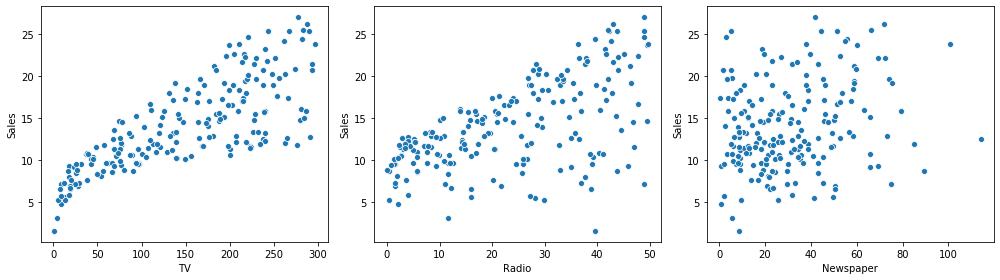

In [15]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14, 4))
sns.scatterplot(x='TV', y='Sales', data=df_ad, ax=ax1)
sns.scatterplot(x='Radio', y='Sales', data=df_ad, ax=ax2);
sns.scatterplot(x='Newspaper', y='Sales', data=df_ad, ax=ax3)
plt.tight_layout();

# Simple linear regression

Focus on: t-statistic, standard errors of coefficient, using scikit-learn and statsmodels

## Get linear regression coefficients for TV dataset using scikit-learn

- Hint: What parameter do you need to set to get the intercept for the term?
- [sklearn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
X = df_ad['TV']
y = df_ad['Sales']

In [18]:
# removed this

X1 = np.array(X).reshape(-1, 1)  # accomodate sklearn

lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(X1, y)

df_skl_coef = pd.DataFrame()
df_skl_coef["coefficients"] = [lin_reg.intercept_] + lin_reg.coef_.tolist()  # np.concatenate((lin_reg.intercept_, lin_reg.coef_.flatten()), axis=0)    # took a while to figure out how to format
df_skl_coef.index = ["constant", X.name]
df_skl_coef

,coefficients
constant,7.032594
TV,0.047537


## Get linear regression coefficients with statsmodels

- Hint: Don't forget to add a vector of 1s using sm.add_constant(X.values)
- [statsmodels documentation](https://www.statsmodels.org/stable/regression.html)
- [explanation of setting target and feature](https://www.statsmodels.org/stable/endog_exog.html)


In [19]:
import statsmodels.api as sm

In [332]:
# endog=target, exog=features
X = df_ad["TV"]
y = df_ad["Sales"]

# removed this
X1 = sm.add_constant(X.values)  # Vector of 1s is needed

In [333]:
# removed this
mod = sm.OLS(endog=y, exog=X1)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Thu, 07 May 2020   Prob (F-statistic):           1.47e-42
Time:                        13:39:29   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.000       6.130       7.935
x1             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [334]:
res.params

const    7.032594
x1       0.047537
dtype: float64

### Questions

- What is the t-statistic for the beta1 coefficient telling us?
- What are the null and alternative hypotheses?

- Insert picture  <-----

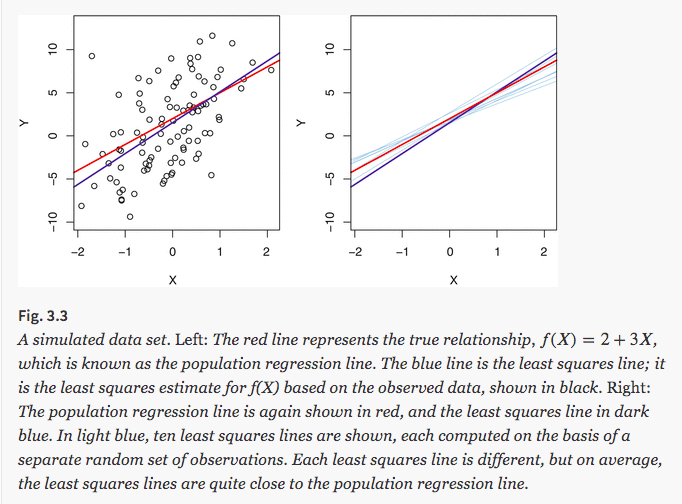

## Manually calculate standard errors of the coefficients with statsmodels output

For calculations below that need coefficient values, pull them from the statsmodels or scikit learn output.

Formulas for standard errors for each coefficient.

$SE(\hat{\beta_0})^2 = \sigma^2[\frac{1}{n} + \frac{\bar{x}^2}{\Sigma(x_i-\bar{x})^2}]$

$SE(\hat{\beta_1})^2 = \frac{{\sigma}^2}{\Sigma(x_i-\bar{x})^2}$

But note that we will substitute **residual standard error** in place of $\sigma$.

$ RSE = \sqrt{RSS/(n-2)}$


**Residual sum of squares**

$ RSS = (y_1 - \hat{\beta_0} - \hat{\beta_1}x_1)^2 + (y_2 - \hat{\beta_0} - \hat{\beta_1}x_2)^2 + ... (y_n - \hat{\beta_0} - \hat{\beta_1}x_n)^2  $


TSS is the *total sum of squares*
<br>
TSS = $\Sigma(y_i - \bar{y_i})^2$                <------ squared distance of the data point **from the average**

RSS is the *residual sum of squares*
<br>
RSS = $\Sigma(y_i - \hat{y_i})^2$                 <------ squared distance of data point **from the model prediction**


In [292]:
def get_sum_dist_squared_v1(arr):
    """
    This can be used for the denominator of the above formulas.
    """
    import numpy
    arr_mean = np.mean(arr)     
    
    sum_dist_squared = 0
    for i in arr:
        sum_dist_squared += (i-arr_mean)**2
    
    return sum_dist_squared

**Write a function to calculate RSS**

In [54]:
def get_rss_v1(beta0, beta1, x_vals, y_vals):
    """
    Used to calculate RSS
    """
    rss = 0
    for i in range(len(x_vals)):
        rss += (y_vals[i]-beta0-beta1*x_vals[i])**2
    return rss

In [43]:
n = len(df_ad)
my_beta0 = 7.0326
my_beta1 = 0.0475

my_rss = get_rss_v1(my_beta0, my_beta1, df_ad['TV'].tolist(), df_ad['Sales'].tolist())
print(my_rss)

2102.538343937501


In [44]:
rse = np.sqrt(my_rss/(n-2))
print(rse)

3.2586623827786876


In [45]:
x_bar = df_ad['TV'].mean()
beta0_se = np.sqrt(rse**2 * (1/n + x_bar**2/get_sum_dist_squared_v1(df_ad['TV'])))
beta1_se = np.sqrt(rse**2/get_sum_dist_squared_v1(df_ad['TV']))

print('Manually calculated beta0 SE {0:0.3f} and beta 1 SE {1:0.3f}'.format(beta0_se, beta1_se))

Manually calculated beta0 SE 0.458 and beta 1 SE 0.003


**Calculate the t-statistic for the beta1 coefficient.**

In [46]:
def calculate_t_statistic(coefficient, se):
    tstat = coefficient/se
    return tstat

In [49]:
my_tstat = calculate_t_statistic(0.0475, beta1_se)
print('Manually calculated t-statistic: {0:0.3f}'.format(my_tstat))

Manually calculated t-statistic: 17.654


**Calculate the f-statistic for this model and data.**

$ F = \frac{(TSS - RSS)/p}{(RSS)/(n-p-1)} $

p = number of features
n = number of samples

In [497]:
def get_tss(y_vals):
    """
    Iterative solution
    """
    y_bar = np.mean(y_vals)
    tss = 0
    for i in range(len(y_vals)):
        tss += (y_vals[i]-y_bar)**2

    return tss

In [498]:
my_tss = get_tss(df_ad['Sales'].tolist())
print(my_tss)

5417.148749999997


**Visual of RSS and TSS**

In [499]:
sales_mean = df_ad['Sales'].mean()
sales_mean

14.0225

In [336]:
def abline(slope, intercept, ax):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    ax.plot(x_vals, y_vals, '--', color='k')

In [390]:
def draw_lines_to_target(x_vals, data_vals, target, color, ax):
    try:
        if len(target) > 1:
            target = target
    except:
        target = [target]*len(x_vals)
    for i in range(len(x_vals)):
        x_point = x_vals[i]
        data_point = data_vals[i]
        target_point = target[i]
        if data_point < target_point:
            plt.vlines(x=x_point, ymin=data_point, ymax=target_point, color=color, linestyle='dashed', linewidth=0.5)
        else:
            plt.vlines(x=x_point, ymax=data_point, ymin=target_point, color=color, linestyle='dashed', linewidth=0.5)    

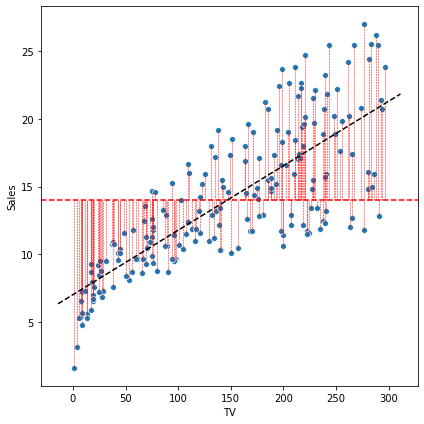

In [391]:
f, (ax1) = plt.subplots(1, 1, figsize=(6, 6))
sns.scatterplot(x='TV', y='Sales', data=df_ad, ax=ax1)
ax1.axhline(sales_mean, color='r', linestyle='dashed')
abline(slope=res.params[1], intercept=res.params[0], ax=ax1)
draw_lines_to_target(df_ad['TV'].tolist(), df_ad['Sales'].tolist(), sales_mean, color='r', ax=ax1)
#ax1.axvline(x=230.1, ymax=22.1, ymin=14.0225, color='r', linestyle='dashed')

plt.tight_layout();

In [396]:
sales_pred = res.params[0] + res.params[1] * df_ad['TV']

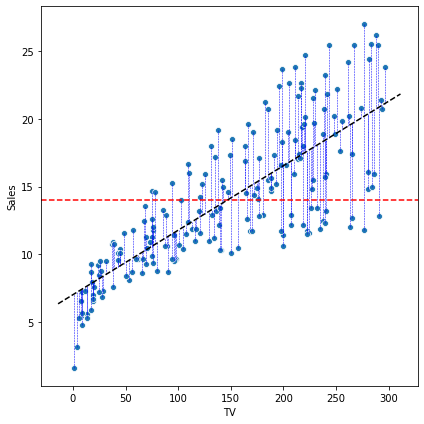

In [399]:
f, (ax1) = plt.subplots(1, 1, figsize=(6, 6))
sns.scatterplot(x='TV', y='Sales', data=df_ad, ax=ax1)
ax1.axhline(sales_mean, color='r', linestyle='dashed')
abline(slope=res.params[1], intercept=res.params[0], ax=ax1)
draw_lines_to_target(df_ad['TV'].tolist(), df_ad['Sales'].tolist(), sales_pred.tolist(), color='b', ax=ax1)

plt.tight_layout();

**Function for f-statistic**

In [52]:
def calculate_f_statistic(tss, rss, n_features, n_samples):
    num = (tss-rss)/n_features
    den = rss/(n_samples-n_features-1)
    f_statistic = num/den
    return f_statistic

In [426]:
my_fstat = calculate_f_statistic(my_tss, my_rss, 1, df_ad.shape[0])

print('Manually calculated f-statistic: {0:0.2f}'.format(my_fstat))

Manually calculated f-statistic: 312.14


**How are the t-statistic and f-statistic related? What linear transformation can you do for one to get the other?**

$ R^2 = \frac{(TSS - RSS)}{TSS} $

In [424]:
def get_r_squared(tss, rss):
    num = (tss-rss)
    den = tss
    r2 = num/den
    return r2

In [308]:
get_r_squared(my_tss, my_rss)

0.6118736182133632

# Multiple linear regression

This approach helps extend analysis to accomdate additional predictors. Each predictor (variable) is given a separate slope coefficient in a single model. **We interpret each coefficient $\beta_j$ as the average effect on the target $Y$ of a one unit increase in its associated feature $X_j$, holding all other features constant.** 

$Y = \beta_0 + \beta_1X_1 + \beta_2X_2 + ... + \beta_pX_p + \epsilon$

## Use statsmodels to get the coefficients and statistics for the model using all three features (TV, Radio, Newspaper)



In [500]:
# endog=target, exog=features
X = df_ad[["TV", "Radio", "Newspaper"]]
y = df_ad["Sales"]
X1 = sm.add_constant(X.values)  # Vector of 1s is needed

In [501]:
mod = sm.OLS(endog=y, exog=X1)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Thu, 07 May 2020   Prob (F-statistic):           1.58e-96
Time:                        17:59:40   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.000       2.324       3.554
x1             0.0458      0.001     32.809      0.000       0.043       0.049
x2             0.1885      0.009     21.893      0.000       0.172       0.206
x3            -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Questions

- What features are significant?
- What does the f-statistic tell us? What are the null and alternate hypotheses?

### Update RSS function to allow for multivariate model

In [502]:
def get_rss_v2(betas, X_vals, y_vals):
    """
    Iterative solution             
    # Exercise 2: Create multivariate linear regression model
    # Hint: It is a lot easier with matrix multiplication
    """
    
    # Update below
    beta_x_matrix = betas*X_vals  
    res_vector = y_vals - np.sum(beta_x_matrix, axis=1)
    rss = np.sum(res_vector**2)

    return rss

### Manually calculate the f-statistic and confirm that it matches the statsmodels output

$ F = \frac{(TSS - RSS)/p}{(RSS)/(n-p-1)} $

In [503]:
my_betas = [2.9389, 0.0458, 0.1885, -0.0010]
my_X_vals = X1
my_y_vals = df_ad['Sales'].tolist()
my_rss_mv = get_rss_v2(my_betas, my_X_vals, my_y_vals)
print(my_rss_mv)

556.8336428345999


In [504]:
my_fstat_mv = calculate_f_statistic(my_tss, my_rss_mv, 3, df_ad.shape[0])
print('Manually calculated f-statistic: {0:0.4f}'.format(my_fstat_mv))

Manually calculated f-statistic: 570.2611


## Another look at the t-statistic and f-statistic

Sometimes we want to test that a particular subset of q of the coefficients are zero. **Generate another model where you leave off newspaper.**


In [416]:
# endog=target, exog=features
X = df_ad[["TV", "Radio"]]
y = df_ad["Sales"]
X1 = sm.add_constant(X.values)  # Vector of 1s is needed

In [417]:
mod = sm.OLS(endog=y, exog=X1)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Thu, 07 May 2020   Prob (F-statistic):           4.83e-98
Time:                        16:08:45   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9211      0.294      9.919      0.000       2.340       3.502
x1             0.0458      0.001     32.909      0.000       0.043       0.048
x2             0.1880      0.008     23.382      0.000       0.172       0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**New F-statistic formula, leaving off newspaper**

$ F = \frac{(RSS_0 - RSS)/q}{(RSS-n-p-1)} $

q = 1 (one feature left out)

**What is this new F value?**

In [423]:
my_betas_noNews = res.params.tolist()
my_rss_mv_noNews = get_rss_v2(my_betas_noNews, my_X_vals[:, 0:3], my_y_vals)
my_rss_mv_noNews

556.9139800676184

In [425]:
my_rss_mv

556.8336428345999

In [424]:
((my_rss_mv_noNews-my_rss_mv)/1)/(my_rss_mv/(n-3-1))

/Users/lacar/anaconda/envs/insight/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in double_scalars
  """Entry point for launching an IPython kernel.


0.0

**Look back at the full model's t-statistic for newspaper and square it.**

In [431]:
(-0.177)**2

0.031328999999999996

**Formula for the t-statistic**

Formula that we have seen for counts data:

$T = \frac{\bar{X} - \mu}{se(\bar{X})} = \frac{\bar{X} - \mu}{S_X/\sqrt{n})}$

In the context of linear regression:

$t = \frac{\bar{\beta_1} - 0}{se(\bar{\beta_1})}$ 

**The t-statistic is reporting how many standard errors the coefficient (slope) is from 0**


TSS is the *total sum of squares*
<br>
TSS = $\Sigma(y_i - \bar{y_i})^2$                <------ squared distance of the data point **from the average**

RSS is the *residual sum of squares*
<br>
RSS = $\Sigma(y_i - \hat{y_i})^2$                 <------ squared distance of data point **from the model prediction**


**Deciding on important variables**

We know that we can look at the F-statistic to see if there is at least *one* feature that significantly related to the response. We can look at p-values of each feature but if the number of features is large, we can make some false discoveries. We could apply a process of *variable* or *feature selection*. We can try different combinations of features but practically that would be time consuming. Instead, we can apply classical approaches for this task:

- *Forward selection*. Start with a null model, one that contains an intercept but no predictors. Then fit *m* simple linear regressions (m=number of features) and add to the null model the variable that results in the lowest RSS. Add a second variable that results in the lowest RSS for the next two-variable model. Keep doing this until some stopping rule is satisifed.
- *Backward selection*. Instead start with all variables in the model, then remove the variable with the largest p-value (least significant). Keep doing this until some stopping rule is reached (e.g. when the remaining variables have a p-value below some threshold.
- *Mixed selection*. A combination of forward and backward selection. Start with no variables in the model, then add variable that best fits like in forward selection. Keep adding until a variable added rises above a p-value threshold, then remove it. Continue performing forward and backward steps until all variables have a sufficiently low p-value and all variables outside the model would have a large p-value if added to the model. (*Not entirely sure I understand this.*)

Note: Backward selection cannot be used if m > n, while forward selection can always be used. Forward selection is a greedy approach, and might include variables early that later become redundant. Mixed selection can remedy this.

More detail about this is discussed in Chapter 6.

# Linking to ANOVA

https://www.theanalysisfactor.com/why-anova-and-linear-regression-are-the-same-analysis/

https://stats.stackexchange.com/questions/224051/one-hot-vs-dummy-encoding-in-scikit-learn

http://www.real-statistics.com/multiple-regression/anova-using-regression/

**Ideas**

1. Look at simple, Khan Academy example (2 and 3 features)
    - Do t-statistic and f-statistic (show where square comes in)
2. Plot RSS
3. Look at advertisements data set

intercept of simple linear regression with TV: 7.0326

## Simple example (2 groups)

In [506]:
df_2f = pd.DataFrame()
df_2f['A'] = [2,1,3,0]
df_2f['B'] = [5,3,4,6]
df_2f

,A,B
0,2,5
1,1,3
2,3,4
3,0,6


### Are the groups significantly different? - t-test

**Null hypothesis: The difference between the groups are 0.**
<br>
**Alternative hypothesis: The difference between the groups is non-zero.**

What is the t-statistic?

$ T = \frac{estimator - true parameter}{standard error} $


In this case:
$ T = \frac{difference - 0}{SE of diff} $

[Khan Academy video on two sample t-test](https://www.khanacademy.org/math/ap-statistics/two-sample-inference#two-sample-t-test-means)


#### Manual calculation

In [507]:
meanA = df_2f['A'].mean()
meanB = df_2f['B'].mean()

diff_means = meanB-meanA

print('Mean of Group A:', meanA)
print('Mean of Group B:', meanB)
print('Difference in means (B-A):', diff_means)

Mean of Group A: 1.5
Mean of Group B: 4.5
Difference in means (B-A): 3.0


**Calculate standard deviation by hand. We already have a function for calculating the sum of squared distances from the mean.**

In [508]:
import inspect
lines = inspect.getsource(get_sum_dist_squared_v1)
print(lines)

def get_sum_dist_squared_v1(arr):
    """
    This can be used for the denominator of the above formulas.
    """
    import numpy
    arr_mean = np.mean(arr)     
    
    sum_dist_squared = 0
    for i in arr:
        sum_dist_squared += (i-arr_mean)**2
    
    return sum_dist_squared



In [509]:
ss_dist_A = get_sum_dist_squared_v1(df_2f['A'])

In [510]:
var = get_sum_dist_squared_v1(df_2f['A'])/(4-1)   # degrees of freedom is n-1
np.sqrt(var)

1.2909944487358056

In [511]:
ss_dist_B = get_sum_dist_squared_v1(df_2f['B'])

In [512]:
std_A = df_2f['A'].std()
std_B = df_2f['B'].std()
print('SD of Group A:', std_A)
print('SD of Group B:', std_B)

n_A = len(df_2f['A'])   
n_B = len(df_2f['B'])
# We have 4 samples in each group

# SE is the sampleSD / sqrt(n)

se_A = std_A/np.sqrt(n_A)
se_B = std_B/np.sqrt(n_B)

# Use pythagorean theorem of statistics
# Var(X+Y) = Var(X-Y) = Var(X) + Var(Y) 

se_diff = np.sqrt(se_A**2 + se_B**2)

print('SE of the difference between B and A):', se_diff)

SD of Group A: 1.2909944487358056
SD of Group B: 1.2909944487358056
SE of the difference between B and A): 0.9128709291752768


In [513]:
t_stat = (diff_means - 0)/se_diff
print('T statistic: ', t_stat)

T statistic:  3.286335345030997


**Use a table or calculator to find the p-value**

[T-statistic calculator](https://stattrek.com/online-calculator/t-distribution.aspx)

In [514]:
# (1- prob)   # You might need to multiply by 2 if you got the cumulative probability

#### Verify with scipy stats function

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html

In [515]:
from scipy import stats
stats.ttest_ind(df_2f['B'],df_2f['A'])

Ttest_indResult(statistic=3.2863353450309964, pvalue=0.016689984315831463)

### Are the groups significantly different? - ANOVA/f-test

Null: All of the underlying true means are identical

mu_a = mu_b ( = mu_c)

[Khan Academy video on ANOVA](https://www.khanacademy.org/math/statistics-probability/analysis-of-variance-anova-library)

#### Manual calculation



In [516]:
# Find the means within each group
df_2f.mean()

A    1.5
B    4.5
dtype: float64

In [517]:
# Find the grand mean (mean across all samples regardelss of groupa)
grand_mean = df_2f.mean().mean()
grand_mean

3.0

In [518]:
df_2f - df_2f.mean()

,A,B
0,0.5,0.5
1,-0.5,-1.5
2,1.5,-0.5
3,-1.5,1.5


In [519]:
ssw = ((df_2f - df_2f.mean())**2).sum().sum()
ssw

10.0

In [520]:
df_2f - grand_mean

,A,B
0,-1.0,2.0
1,-2.0,0.0
2,0.0,1.0
3,-3.0,3.0


In [521]:
sst = ((df_2f - grand_mean)**2).sum().sum()
ssb = sst-ssw

ssb

18.0

**Manually calculated f-statistic**

In [522]:
n = df_2f.shape[0]
m = df_2f.shape[1]

In [523]:
(ssb/(m-1)) / (ssw/(m*(n-1)))

10.799999999999999

#### Verify with scipy stats function

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html

In [524]:
stats.f_oneway(df_2f['A'], df_2f['B'])

F_onewayResult(statistic=10.799999999999999, pvalue=0.01668998431583147)

#### Square the t-statistic

In [525]:
3.286335**2

10.799997732224998

### Applying regression - t-test on the coefficients

Null: Coefficient is 0

beta = 0

In [526]:
df_2f_reg = pd.DataFrame()
df_2f_reg['y'] = np.array(df_2f.T.values).flatten()

In [527]:
np.array(df_2f.T.values).flatten()

array([2, 1, 3, 0, 5, 3, 4, 6])

In [528]:
df_2f_reg['dummyA'] = [1,1,1,1,0,0,0,0]
df_2f_reg['dummyB'] = [0,0,0,0,1,1,1,1]

In [529]:
df_2f_reg

,y,dummyA,dummyB
0,2,1,0
1,1,1,0
2,3,1,0
3,0,1,0
4,5,0,1
5,3,0,1
6,4,0,1
7,6,0,1


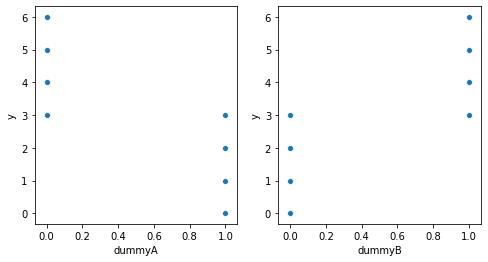

In [530]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
sns.scatterplot(x='dummyA', y='y', data=df_2f_reg, ax=ax1)
sns.scatterplot(x='dummyB', y='y', data=df_2f_reg, ax=ax2)

In [531]:
# endog=target, exog=features
X = df_2f_reg[["dummyA", "dummyB"]]
y = df_2f_reg["y"]
X1 = sm.add_constant(X.values)  # Vector of 1s is needed

In [532]:
mod = sm.OLS(endog=y, exog=X1)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.643
Model:                            OLS   Adj. R-squared:                  0.583
Method:                 Least Squares   F-statistic:                     10.80
Date:                Thu, 07 May 2020   Prob (F-statistic):             0.0167
Time:                        18:00:46   Log-Likelihood:                -12.244
No. Observations:                   8   AIC:                             28.49
Df Residuals:                       6   BIC:                             28.65
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0000      0.304      6.573      0.001       1.255       2.745
x1            -0.5000      0.481     -1.039      0.339      -1.677       0.677
x2             2.5000      0.481      5.196      0.002       1.323       3.677
==============================================================================
Omnibus:                        1.177   Durbin-Watson:                   2.700
Prob(Omnibus):                  0.555   Jarque-Bera (JB):                0.617
Skew:                           0.000   Prob(JB):                        0.735
Kurtosis:                       1.640   Cond. No.                     8.79e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.55e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

**You can get the means of the groups from adding the coefficient and intercept**

In [533]:
res.params

const    2.0
x1      -0.5
x2       2.5
dtype: float64

In [534]:
res.params[0] + res.params[1]

1.4999999999999996

In [535]:
res.params[0] + res.params[2]

4.5

### Applying regression - f-test on the coefficients

Null: All coefficients are 0.

beta1 = beta2 (=beta3) = 0

In [536]:
res.params

const    2.0
x1      -0.5
x2       2.5
dtype: float64

In [537]:
my_betas = res.params.tolist()
my_X_vals = X1
my_y_vals = y
my_rss_mv = get_rss_v2(my_betas, my_X_vals, my_y_vals)
print(my_rss_mv)

10.0


In [538]:
my_tss = get_tss(y)
print(my_tss)

28.0


In [543]:
# 1 degree of freedom
my_fstat_mv = calculate_f_statistic(my_tss, my_rss_mv, df_2f_reg.shape[1]-2, df_2f_reg.shape[0])
print('Manually calculated f-statistic: {0:0.4f}'.format(my_fstat_mv))

Manually calculated f-statistic: 10.8000


## Simple example - 3 groups

### Applying regression - f-test on the coefficients

Null: All coefficients are 0.

beta1 = beta2 (=beta3) = 0

#### Simple example 1 - ANOVA

In [273]:
df_anova = pd.DataFrame()
df_anova['A'] = [3,2,1,1]
df_anova['B'] = [5,3,4,3]
df_anova['C'] = [5,6,7,7]
df_anova

,A,B,C
0,3,5,5
1,2,3,6
2,1,4,7
3,1,3,7


In [274]:
df_anova.mean()

A    1.75
B    3.75
C    6.25
dtype: float64

In [275]:
grand_mean = df_anova.mean().mean()
grand_mean

3.9166666666666665

In [276]:
df_anova - df_anova.mean()

,A,B,C
0,1.25,1.25,-1.25
1,0.25,-0.75,-0.25
2,-0.75,0.25,0.75
3,-0.75,-0.75,0.75


In [277]:
ssw = ((df_anova - df_anova.mean())**2).sum().sum()
ssw

8.25

In [278]:
df_anova - grand_mean

,A,B,C
0,-0.916667,1.083333,1.083333
1,-1.916667,-0.916667,2.083333
2,-2.916667,0.083333,3.083333
3,-2.916667,-0.916667,3.083333


In [279]:
sst = ((df_anova - grand_mean)**2).sum().sum()

ssb = sst-ssw
ssb

40.666666666666664

**Manually calculated f-statistic**

In [280]:
n = df_anova.shape[0]
m = df_anova.shape[1]

In [290]:
f_stat_manual = (ssb/(m-1)) / (ssw/(m*(n-1)))
f_stat_manual

22.18181818181818

#### Simple example 1 - turn into regression model

In [282]:
df_anova_reg = pd.DataFrame()

In [283]:
df_anova_reg['y'] = np.array(df_anova.T.values).flatten()

In [284]:
np.array(df_anova.T.values).flatten()

array([3, 2, 1, 1, 5, 3, 4, 3, 5, 6, 7, 7])

In [285]:
df_anova_reg['dummyA'] = [1,1,1,1,0,0,0,0,0,0,0,0]
df_anova_reg['dummyB'] = [0,0,0,0,1,1,1,1,0,0,0,0]
df_anova_reg['dummyC'] = [0,0,0,0,0,0,0,0,1,1,1,1]

In [286]:
df_anova_reg

,y,dummyA,dummyB,dummyC
0,3,1,0,0
1,2,1,0,0
2,1,1,0,0
3,1,1,0,0
4,5,0,1,0
5,3,0,1,0
6,4,0,1,0
7,3,0,1,0
8,5,0,0,1
9,6,0,0,1


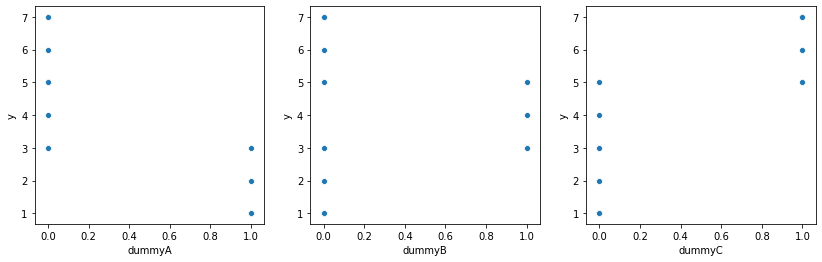

In [287]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14, 4))
sns.scatterplot(x='dummyA', y='y', data=df_anova_reg, ax=ax1)
sns.scatterplot(x='dummyB', y='y', data=df_anova_reg, ax=ax2)
sns.scatterplot(x='dummyC', y='y', data=df_anova_reg, ax=ax3)

In [288]:
# endog=target, exog=features
X = df_anova_reg[["dummyA", "dummyB", "dummyC"]]
y = df_anova_reg["y"]
X1 = sm.add_constant(X.values)  # Vector of 1s is needed

In [289]:
mod = sm.OLS(endog=y, exog=X1)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     22.18
Date:                Thu, 07 May 2020   Prob (F-statistic):           0.000332
Time:                        11:29:30   Log-Likelihood:                -14.779
No. Observations:                  12   AIC:                             35.56
Df Residuals:                       9   BIC:                             37.01
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9375      0.207     14.171      0.000       2.469       3.406
x1            -1.1875      0.397     -2.992      0.015      -2.085      -0.290
x2             0.8125      0.397      2.047      0.071      -0.085       1.710
x3             3.3125      0.397      8.345      0.000       2.415       4.210
==============================================================================
Omnibus:                        2.466   Durbin-Watson:                   1.727
Prob(Omnibus):                  0.291   Jarque-Bera (JB):                0.995
Skew:                           0.164   Prob(JB):                        0.608
Kurtosis:                       1.628   Cond. No.                     7.86e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.59e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

**You can get the means of the groups from adding the coefficient and intercept**

In [324]:
res.params

const    2.9375
x1      -1.1875
x2       0.8125
x3       3.3125
dtype: float64

In [145]:
res.params[0] + res.params[1]

1.750000000000001

In [146]:
res.params[0] + res.params[2]

3.7500000000000018

In [147]:
res.params[0] + res.params[3]

6.250000000000002

#### Simple example, 2 groups - ANOVA

In [152]:
df_anova_2f = 

,A,B,C
0,3,5,5
1,2,3,6
2,1,4,7
3,1,3,7


In [ ]:
def abline(slope, intercept, ax):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    ax.plot(x_vals, y_vals, '--')

In [148]:
# endog=target, exog=features
X = df_anova_reg[["dummyA"]]
y = df_anova_reg["y"]
X1 = sm.add_constant(X.values)  # Vector of 1s is needed

In [149]:
mod = sm.OLS(endog=y, exog=X1)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.576
Model:                            OLS   Adj. R-squared:                  0.533
Method:                 Least Squares   F-statistic:                     13.57
Date:                Thu, 07 May 2020   Prob (F-statistic):            0.00422
Time:                        08:51:05   Log-Likelihood:                -20.313
No. Observations:                  12   AIC:                             44.63
Df Residuals:                      10   BIC:                             45.60
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.0000      0.509      9.818      0.000       3.865       6.135
x1            -3.2500      0.882     -3.684      0.004      -5.215      -1.285
==============================================================================
Omnibus:                        0.692   Durbin-Watson:                   0.702
Prob(Omnibus):                  0.708   Jarque-Bera (JB):                0.581
Skew:                           0.041   Prob(JB):                        0.748
Kurtosis:                       1.925   Cond. No.                         2.41
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [151]:
res.params

const    5.00
x1      -3.25
dtype: float64

### Handwritten example (KA)

In [233]:
df_anova = pd.DataFrame()
df_anova['A'] = [3,2,1]
df_anova['B'] = [5,3,4]
df_anova['C'] = [5,6,7]
df_anova

,A,B,C
0,3,5,5
1,2,3,6
2,1,4,7


In [234]:
df_anova.mean()

A    2.0
B    4.0
C    6.0
dtype: float64

In [235]:
grand_mean = df_anova.mean().mean()
grand_mean

4.0

In [236]:
df_anova - df_anova.mean()

,A,B,C
0,1.0,1.0,-1.0
1,0.0,-1.0,0.0
2,-1.0,0.0,1.0


In [237]:
ssw = ((df_anova - df_anova.mean())**2).sum().sum()
ssw

6.0

**Calculating sum of squares total (SST) or the total variation is each point minus the grand mean**

In [243]:
sst = ((df_anova - grand_mean)**2).sum().sum()
sst

30.0

**Sum of squares between (SSB) is SST-SSW**

In [245]:
ssb = sst-ssw
ssb

24.0

**CAREFUL: SSB can be calculated on its own but each point is represented by its own mean and not its value.**

In [258]:
df_anova_grp_mean = pd.concat([df_anova.mean()] * 3, axis=1).T
df_anova_grp_mean

,A,B,C
0,2.0,4.0,6.0
1,2.0,4.0,6.0
2,2.0,4.0,6.0


In [260]:
ssb = ((df_anova_grp_mean - grand_mean)**2).sum().sum()
ssb

24.0

In [216]:
n = df_anova.shape[0]
m = df_anova.shape[1]

In [262]:
f_stat_manual = (ssb/(m-1)) / (ssw/(m*(n-1)))
f_stat_manual

12.0

In [264]:
# From scipy stats
stats.f_oneway(df_anova['A'], df_anova['B'], df_anova['C'])

F_onewayResult(statistic=12.0, pvalue=0.008000000000000002)